# Drawing Functions

## Draw a Line Segment on an Image

The `cv2.line` function in the OpenCV library allows you to draw a straight line segment connecting two specified points on an image. This function provides control over line appearance, thickness, and antialiasing, making it a versatile tool for various computer vision and image processing tasks {cite:p}`opencv_library, OpenCVDocumentation`.

* **syntax:**

```python
cv2.line(img, pt1, pt2, color[, thickness[, lineType[, shift]]]) -> None
```

* **Parameters**

- `img`: The input image where the line will be drawn.
- `pt1`: The starting point (x, y) of the line segment.
- `pt2`: The ending point (x, y) of the line segment.
- `color`: The color of the line in BGR format (Blue, Green, Red).
- `thickness`: (Optional) The thickness of the line. Default is 1. Use a negative value to fill the line with the specified color.
- `lineType`: (Optional) The type of line to draw. Default is 8-connected line (cv2.LINE_8). Other options include 4-connected line (cv2.LINE_4) and antialiased line (cv2.LINE_AA).
- `shift`: (Optional) The fractional pixel shift within the line coordinates. Default is 0.

* **Line Types**

- `cv2.LINE_8`: 8-connected line. Used by default.
- `cv2.LINE_4`: 4-connected line.
- `cv2.LINE_AA`: Antialiased line, providing smoother edges.

* **Behavior**

- The line is clipped to remain within the image boundaries.
- Integer coordinates without antialiasing use Bresenham algorithms (8-connected or 4-connected).
- Thick lines have rounded endings for a smoother appearance.
- Antialiased lines are drawn using Gaussian filtering to reduce aliasing artifacts.

* **Return Value**

This function modifies the input image (`img`) directly to include the specified line segment. No return value is provided (`None`).

<span style='color:Blue'><strong>Example</strong></span>: In this Example, we employ the [image dataset](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_sample_images.html#sklearn.datasets.load_sample_images) from sklearn and perform fundamental operations using OpenCV.

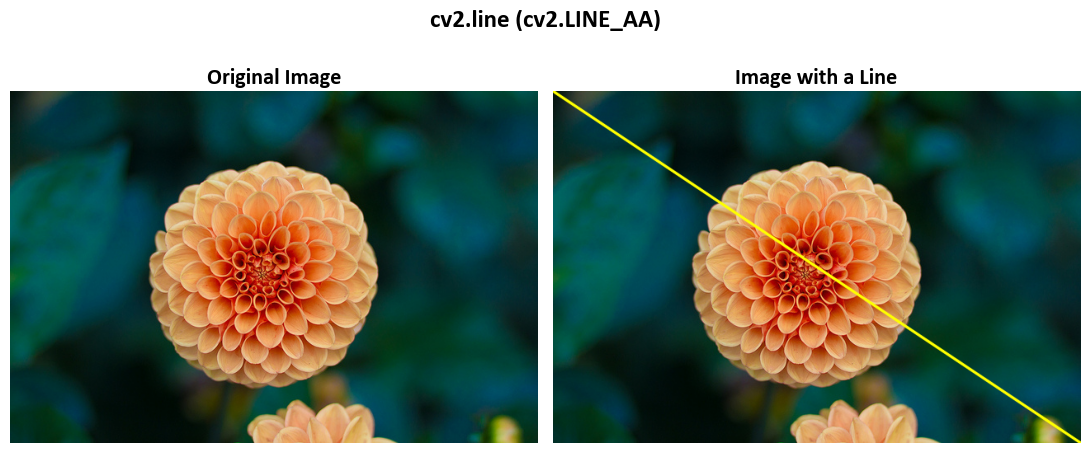

In [1]:
import matplotlib.pyplot as plt
import cv2

Colors={'White':(255, 255, 255), 'Black':(0, 0, 0), 'Red':(255,0,0),'Green':(0,255,0), 'Blue':(0,0,255),
        'Yellow':(255,255,0), 'Purple':(128,0,128), 'Indigo':(75,0,130),'OrangeRed':(255,69,0)}

# Define a function to display images with titles and optional settings
plt.rcParams.update({'font.family' : 'Calibri', 'axes.titlesize' : 16})  # Set font properties for plots
def ImShow(Images, Names, title='Images', grayscale=False):
    # Create a figure with two subplots
    fig, ax = plt.subplots(1, 2, figsize=(11, 5))  # Create a figure with 1 row and 2 columns of subplots
    ax = ax.ravel()  # Flatten the subplots for easier manipulation

    # Iterate over the first two images
    for i in range(2):
        if grayscale:
            _ = ax[i].imshow(Images[i], 'gray')  # Display the image in grayscale
        else:
            _ = ax[i].imshow(Images[i])  # Display the image in color
        _ = ax[i].set_aspect(1)  # Set aspect ratio to 1 (square aspect)
        _ = ax[i].axis('off')  # Turn off axis
        _ = ax[i].set_title(Names[i], weight='bold')  # Set image title with bold font

    if title:
        _ = fig.suptitle(title, weight='bold', fontsize=18)  # Set main title if provided
    
    plt.tight_layout()  # Adjust layout for better spacing

    return fig, ax

# Load sample images
from sklearn.datasets import load_sample_images
Images = load_sample_images()['images']
# Extract image names from file paths, removing extension and converting to title case
Names = [x.split("/")[-1].replace('.jpg', '').title() for x in load_sample_images()['filenames']]

# Create an image with a yellow line
Img = Images[1].copy()  # Copy the second image
Out = Img.copy()  # Create a copy of the image
# Draw a yellow line from top-left to bottom-right
_ = cv2.line(Out, (0, 0), Out.shape[:2][::-1], Colors['Yellow'], thickness=2, lineType=cv2.LINE_AA)

# Show the original and modified images with titles
fig, ax = ImShow([Img, Out], ['Original Image', 'Image with a Line'], title='cv2.line (cv2.LINE_AA)')

This code segment does the following:

1. **Load Sample Images**: It imports the function `load_sample_images` from the `sklearn.datasets` module to load a set of sample images. These images are typically used for testing and demonstrating image processing algorithms.

2. **Extract Image Names**: The code extracts the actual images from the loaded sample images using `load_sample_images()['images']`. It also extracts the filenames of these images using `load_sample_images()['filenames']`. Then, it processes these filenames to extract the image names by splitting the file path at each "/", taking the last part of the path, removing the ".jpg" extension, and converting the name to title case (capitalizing each word).

3. **Create an Image with a Yellow Line**: It selects the second image from the loaded sample images (index 1) and creates a copy of it, referred to as `img`. Then, it makes another copy called `out`. The purpose of `out` is to modify the copy of the image (`img`) by drawing a yellow line from the top-left corner to the bottom-right corner using the `cv2.line` function from the OpenCV library. The line is drawn with the specified color (yellow), thickness (2 pixels), and line type (`cv2.LINE_AA` for anti-aliased line).

## Rectangle

The function you're referring to is `cv2.rectangle` from the OpenCV library in Python. It's used to draw a rectangle on an image. Let's break down the function signature and its parameters {cite:p}`opencv_library, OpenCVDocumentation`:

**Function Signature:**

```python
cv2.rectangle(img, pt1, pt2, color[, thickness[, lineType[, shift]]]) → None
```

**Parameters:**

- `img`: The input image on which the rectangle will be drawn.
- `pt1`: The coordinates (x1, y1) of the top-left corner of the rectangle.
- `pt2`: The coordinates (x2, y2) of the bottom-right corner of the rectangle.
- `color`: The color of the rectangle in BGR format (Blue, Green, Red).
- `thickness`: (Optional) The thickness of the rectangle's edges. If a positive value is given, it draws the edges of the rectangle. If a negative value is given, it fills the rectangle with the specified color. The default is 1, which draws a thin rectangle outline.
- `lineType`: (Optional) The type of the rectangle's edges. Default is 8-connected line (cv2.LINE_8). Other options include 4-connected line (cv2.LINE_4) and antialiased line (cv2.LINE_AA).
- `shift`: (Optional) The number of fractional bits in the point coordinates. This parameter allows sub-pixel positioning of the rectangle, providing smoother results for antialiased rectangles. The default is 0.

**Behavior:**

- The rectangle is drawn with the top-left corner specified by `pt1` and the bottom-right corner specified by `pt2`.
- The rectangle can be either a filled rectangle (when `thickness` is negative) or an outlined rectangle (when `thickness` is positive).
- The rectangle can be drawn with different line types, affecting the appearance of its edges (8-connected, 4-connected, or antialiased).

**Return Value:**

This function modifies the input image `img` directly, drawing the specified rectangle on it. The function does not return a value (`None`).

In summary, the `cv2.rectangle` function in OpenCV is used to draw a rectangle on an image, with control over its position, size, color, edge thickness, and line type, making it a versatile tool for various image processing tasks that involve drawing or marking regions of interest.

<font color='Blue'><b>Example</b></font>:

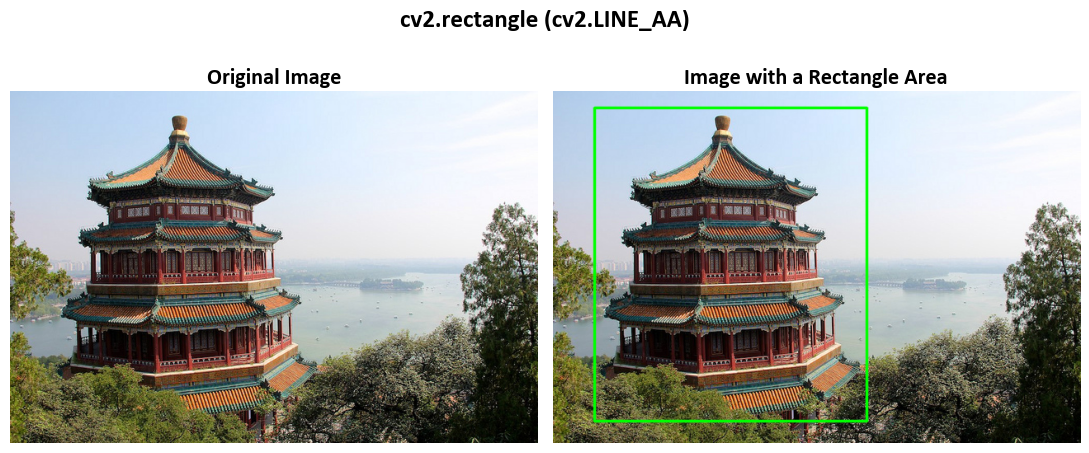

In [2]:
# Create an image with a yellow line
Img = Images[0].copy()  # Copy the second image
Out = Img.copy()  # Create a copy of the image
# Draw a green rectangle
_ = cv2.rectangle(Out, (50, 20), (380, 400), Colors['Green'], thickness=2, lineType=cv2.LINE_AA)

# Show the original and modified images with titles
fig, ax = ImShow([Img, Out], ['Original Image', 'Image with a Rectangle Area'],
                 title = 'cv2.rectangle (cv2.LINE_AA)')

This code segment does the following:

1. **Create an Image with a Yellow Line**: It assumes that there is a list of images called `Images`. It selects the first image from this list (index 0) and makes a copy of it, referred to as `Img`. Then, it creates another copy called `Out`. The purpose of `Out` is to modify the copy of the image (`Img`) by drawing a green rectangle.

2. **Draw a Green Rectangle**: It uses the OpenCV library (cv2) to draw a green rectangle on the `Out` image. The rectangle is defined by specifying the top-left and bottom-right coordinates of the rectangle area. In this case, the top-left corner is at coordinates (50, 20), and the bottom-right corner is at coordinates (380, 400). The specified color for the rectangle is green, the thickness of the lines used to draw the rectangle is 2 pixels, and `cv2.LINE_AA` is used for anti-aliased line rendering.

3. **Show the Original and Modified Images with Titles**: It uses the `ImShow` function (assumed to be defined elsewhere in the code) to display both the original image (`Img`) and the modified image with the green rectangle (`Out`). The titles for these images are specified as 'Original Image' and 'Image with a Rectangle Area', and a main title 'Rectangle' is set for the entire figure.

<font color='Blue'><b>Example</b></font>:

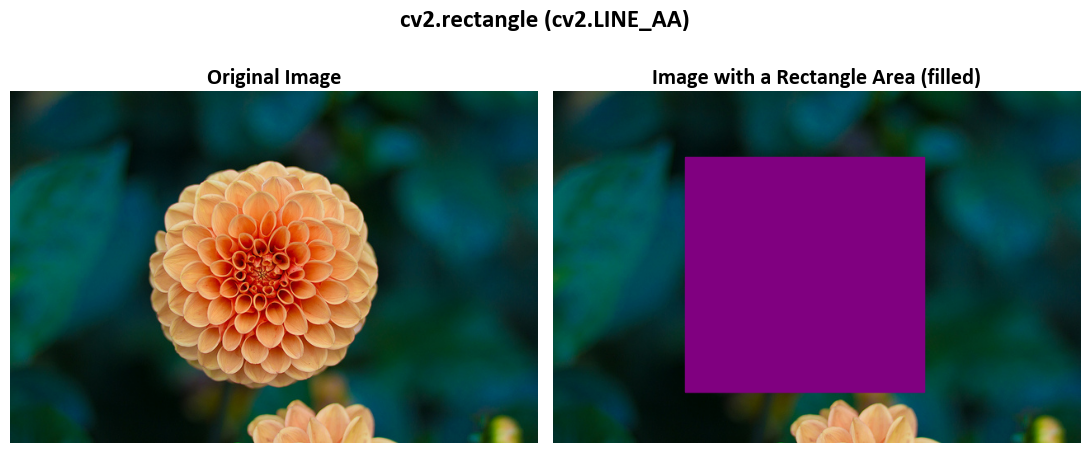

In [3]:
# Create an image with a yellow line
Img = Images[1].copy()  # Copy the second image
Out = Img.copy()  # Create a copy of the image
# Draw a purple filled rectangle
_ = cv2.rectangle(Out, (160, 80), (450, 365), Colors['Purple'], thickness=-1, lineType=cv2.LINE_AA)

# Show the original and modified images with titles
fig, ax = ImShow([Img, Out], ['Original Image', 'Image with a Rectangle Area (filled)'],
                 title='cv2.rectangle (cv2.LINE_AA)')

This code segment does the following:

1. **Create an Image with a Yellow Line**: It assumes that there is a list of images called `Images`. It selects the second image from this list (index 1) and makes a copy of it, referred to as `Img`. Then, it creates another copy called `Out`. The purpose of `Out` is to modify the copy of the image (`Img`) by drawing a filled purple rectangle.

2. **Draw a Purple Filled Rectangle**: It uses the OpenCV library (cv2) to draw a filled purple rectangle on the `Out` image. The rectangle is defined by specifying the top-left and bottom-right coordinates of the rectangle area. In this case, the top-left corner is at coordinates (160, 80), and the bottom-right corner is at coordinates (450, 365). The specified color for the rectangle is purple, and `thickness` is set to -1, which indicates that the rectangle should be filled with the specified color. The `cv2.LINE_AA` is used for anti-aliased line rendering, even though it doesn't apply to filled rectangles.

3. **Show the Original and Modified Images with Titles**: It uses the `ImShow` function (assumed to be defined elsewhere in the code) to display both the original image (`Img`) and the modified image with the filled purple rectangle (`Out`). The titles for these images are specified as 'Original Image' and 'Image with a Rectangle Area (filled)', and a main title 'Image with a Rectangle Area (filled)' is set for the entire figure.

## Circle

This `cv2.circle` function is highly versatile and empowers you to specify the circle's center, radius, color, thickness, and other properties, giving you full control over the appearance of the circle you want to draw on the image {cite:p}`opencv_library, OpenCVDocumentation`.

```python
cv2.circle(img, center, radius, color[, thickness[, lineType[, shift]]]) → None
```

1. `cv2`: This is the namespace or module in OpenCV that provides a collection of functions for various image processing tasks.

2. `circle`: This function is specifically designed to draw circles on images using the OpenCV library.

3. `img`: This is the input image on which the circle will be drawn. It's represented as a NumPy array, and you'll be modifying this image to add the circle.

4. `center`: A tuple `(x, y)` representing the coordinates of the center of the circle within the image. The point `(0, 0)` is usually considered the top-left corner of the image.

5. `radius`: A numerical value that specifies the radius of the circle in pixels. This value determines the size of the circle.

6. `color`: The color of the circle, represented as a tuple with three elements `(B, G, R)`, where each element represents the intensity of the Blue, Green, and Red color channels, respectively. The values range from 0 to 255, indicating the color's intensity.

7. `thickness` (optional): An optional parameter that defines the thickness of the circle's outline. If this parameter is given a positive value, the circle is drawn with the specified thickness. Setting `thickness` to -1 results in a filled circle with the specified color.

8. `lineType` (optional): Another optional parameter that determines the type of boundary line for the circle. It's an integer value that indicates how the circle boundary is drawn. The default is typically an 8-connected line, which means the circle boundary is connected. An alternative option is `cv2.LINE_AA`, which creates an anti-aliased line, providing smoother edges.

9. `shift` (optional): An additional optional parameter that controls the precision of the center and radius by specifying the number of fractional bits. It's mainly used for fixed-point arithmetic and allows for finer control over the circle's position and size.

The `→ None` part in the documentation indicates that the function does not return any value. Instead, it directly modifies the input image by drawing the specified circle on it.

<font color='Blue'><b>Example</b></font>:

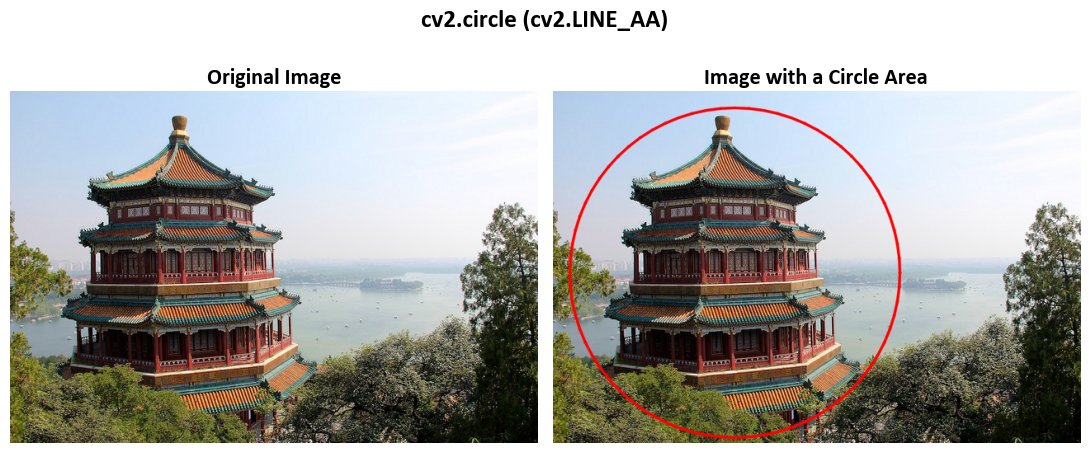

In [4]:
# Create an image with a yellow line
Img = Images[0].copy()  # Copy the second image
Out = Img.copy()  # Create a copy of the image
# Draw a red cirlce
_ = cv2.circle(Out, (220, 220), 200, Colors['Red'], thickness=2, lineType=cv2.LINE_AA)

# Show the original and modified images with titles
fig, ax = ImShow([Img, Out], ['Original Image', 'Image with a Circle Area'],
                 title='cv2.circle (cv2.LINE_AA)')

This code essentially takes an image, creates a copy, draws a red circle on the copy, and displays both the original and modified images with appropriate titles. Note that the code snippet references external functions (`ImShow`) and variables (`Colors['Red']`) which are assumed to be defined elsewhere in the code. This code snippet does the following:

1. **Image Preparation:**
   - It starts with an array of images, `Images`, and selects the second image (index 0-based) from this array.
   - A copy of this selected image is created and stored in the variable `Img`.
   - Another copy of the same image is created and stored in the variable `Out`. This copy will be used for further modifications.

2. **Drawing a Circle:**
   - It uses the OpenCV library to draw a red circle on the `Out` image.
   - The circle is centered at coordinates (220, 220) with a radius of 200 pixels.
   - The circle is drawn with a red color (represented by `Colors['Red']`) and has an outline thickness of 2 pixels.
   - The `cv2.LINE_AA` argument specifies that anti-aliased lines should be used for smoother edges.

3. **Displaying Images:**
   - A function called `ImShow` (not defined in this snippet) is used to display two images side by side.
   - The original image (`Img`) and the modified image with the red circle (`Out`) are shown.
   - Titles are provided for each image: "Original Image" for `Img` and "Image with a Circle Area" for `Out`.
   - The title `'cv2.circle (cv2.LINE_AA)'` is likely shown above the images, describing the operation that was performed.

<font color='Blue'><b>Example</b></font>:

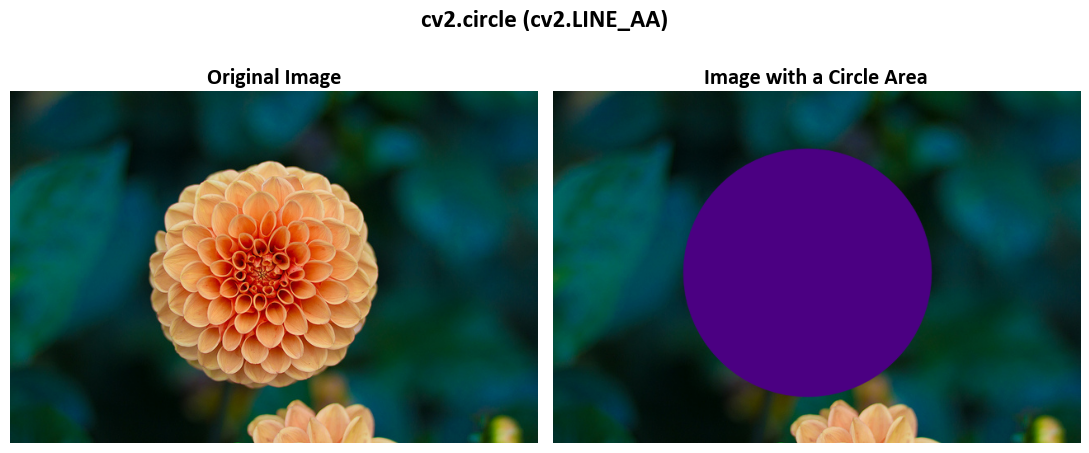

In [5]:
# Create an image with a yellow line
Img = Images[1].copy()  # Copy the second image
Out = Img.copy()  # Create a copy of the image
# Draw a filled indigo cirlce
_ = cv2.circle(Out, (308, 220), 150, Colors['Indigo'], thickness=-1, lineType=cv2.LINE_AA)

# Show the original and modified images with titles
fig, ax = ImShow([Img, Out], ['Original Image', 'Image with a Circle Area'],
                 title='cv2.circle (cv2.LINE_AA)')

## Ellipse


This `cv2.ellipse` function is versatile and empowers you to specify the ellipse's center, major and minor axes, rotation angle, arc angles, color, thickness, and other properties, giving you full control over the appearance of the ellipse you want to draw on the image {cite:p}`opencv_library, OpenCVDocumentation`.

```python
cv2.ellipse(img, center, axes, angle, startAngle, endAngle, color[, thickness[, lineType[, shift]]]) → None
```

1. `cv2`: This is the namespace or module in OpenCV that contains various image processing functions.

2. `ellipse`: This function is specifically designed to draw ellipses (oval shapes) on images using the OpenCV library.

3. `img`: This is the input image on which the ellipse will be drawn. It's represented as a NumPy array, and you'll be modifying this image to add the ellipse.

4. `center`: A tuple `(x, y)` representing the coordinates of the center of the ellipse within the image. The point `(0, 0)` is typically considered the top-left corner of the image.

5. `axes`: A tuple `(majorAxis, minorAxis)` representing the lengths of the major and minor axes of the ellipse. These axes determine the size and shape of the ellipse.

6. `angle`: The rotation angle of the ellipse in degrees. The rotation is applied to the major axis, which helps you orient the ellipse in a specific direction.

7. `startAngle`: The starting angle of the elliptical arc in degrees. The arc is drawn from this angle.

8. `endAngle`: The ending angle of the elliptical arc in degrees. The arc is drawn up to this angle, forming a partial ellipse if `startAngle` is not 0.

9. `color`: The color of the ellipse, represented as a tuple with three elements `(B, G, R)`, where each element represents the intensity of the Blue, Green, and Red color channels, respectively. The values range from 0 to 255, indicating the color's intensity.

10. `thickness` (optional): An optional parameter that defines the thickness of the ellipse's outline. If this parameter is given a positive value, the ellipse is drawn with the specified thickness. Setting `thickness` to -1 results in a filled ellipse with the specified color.

11. `lineType` (optional): Another optional parameter that determines the type of boundary line for the ellipse. It's an integer value that indicates how the ellipse boundary is drawn. The default is typically an 8-connected line, which means the boundary is connected. An alternative option is `cv2.LINE_AA`, which creates an anti-aliased line, providing smoother edges.

12. `shift` (optional): An additional optional parameter that controls the precision of the center and the axes by specifying the number of fractional bits. It's mainly used for fixed-point arithmetic, allowing for finer control over the ellipse's position, size, and rotation.

The `→ None` part in the documentation indicates that the function does not return any value. Instead, it directly modifies the input image by drawing the specified ellipse on it.


<font color='Blue'><b>Example</b></font>:

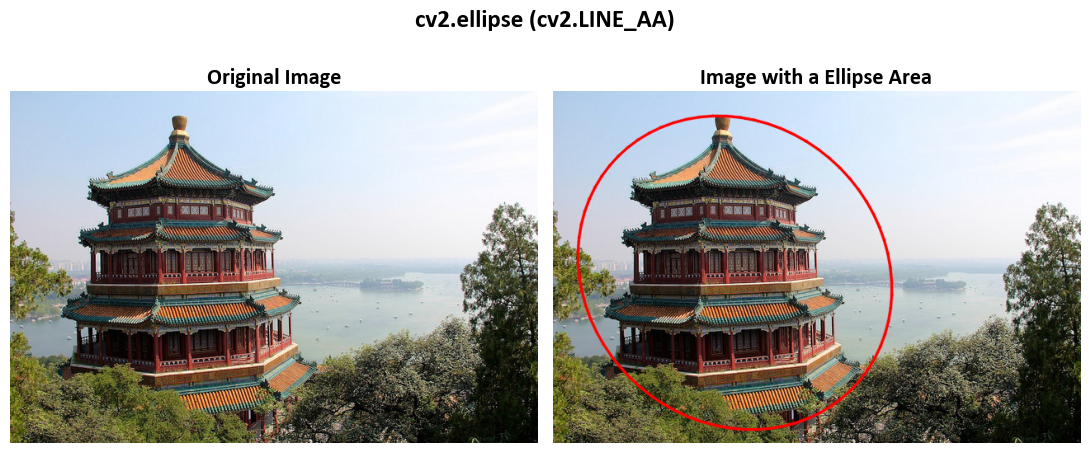

In [6]:
# Create an image with a yellow line
Img = Images[0].copy()  # Copy the second image
Out = Img.copy()  # Create a copy of the image
# Draw a red ellipse
_ = cv2.ellipse(Out, (220, 220), (200, 180), 45, 0, 360, Colors['Red'], thickness=2, lineType=cv2.LINE_AA)

# Show the original and modified images with titles
fig, ax = ImShow([Img, Out], ['Original Image', 'Image with a Ellipse Area'],
                 title='cv2.ellipse (cv2.LINE_AA)')

## Clip Line


The `cv2.clipLine` function is useful for various image processing tasks where you need to ensure that a line segment does not exceed the specified region, such as when rendering or analyzing objects within a certain image area {cite:p}`opencv_library, OpenCVDocumentation`.


```python
cv2.clipLine(imgRect, pt1, pt2) → retval, pt1, pt2
```

1. `cv2`: This is the namespace or module in OpenCV that contains various image processing functions.

2. `clipLine`: This function is used for clipping a line segment within a given image rectangle using OpenCV.

3. `imgRect`: This parameter represents the rectangular region within which the line segment should be clipped. It's usually defined as a tuple or a rectangle object specifying the boundaries of the image region.

4. `pt1`: A tuple `(x1, y1)` representing the starting point of the line segment you want to clip. This point is defined by its x and y coordinates.

5. `pt2`: A tuple `(x2, y2)` representing the ending point of the line segment you want to clip. This point is also defined by its x and y coordinates.

6. `retval`: The return value of the function, which indicates whether the line segment lies fully, partially, or completely outside the specified image rectangle. This return value helps you understand whether the line segment was successfully clipped or not.

The `→` arrow in the documentation indicates that the function returns a value. In this case, it returns `retval`, which represents the result of the clipping operation, along with the updated `pt1` and `pt2` points, which may have been adjusted during the clipping process.

The purpose of this function is to ensure that a line segment defined by `pt1` and `pt2` lies within the specified image rectangle (`imgRect`). If the line segment extends beyond the boundaries of the rectangle, it is clipped to fit within the rectangle, and the function provides information about the clipping result.

<font color='Blue'><b>Example</b></font>:

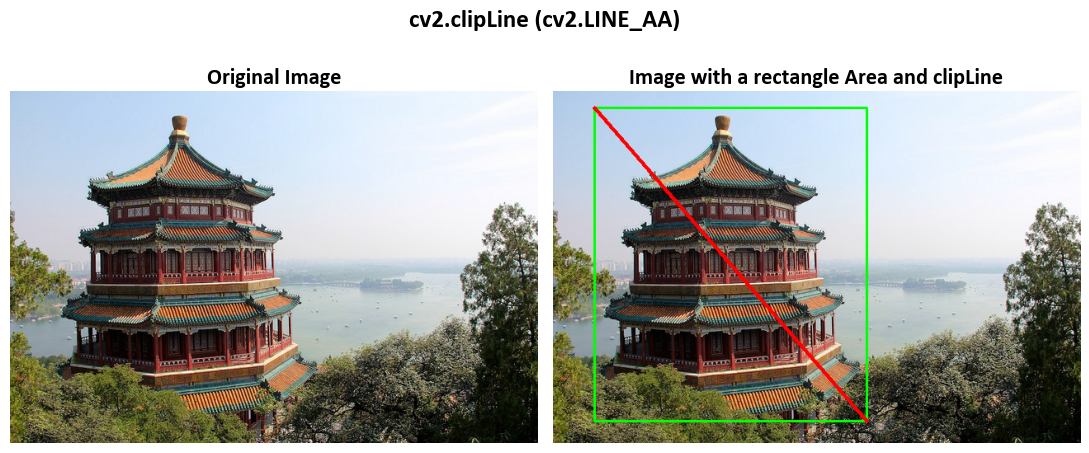

In [7]:
# Create an image with a yellow line
Img = Images[0].copy()  # Copy the second image
Out = Img.copy()  # Create a copy of the image
# Draw a Clip Line
_ = cv2.rectangle(Out, (50, 20), (380, 400), Colors['Green'], 2)
_ = ret, p1, p2 = cv2.clipLine((0, 0, Out.shape[0], Out.shape[1]), (50, 20), (380, 400))

if ret:
    cv2.line(Out, p1, p2, Colors['Red'], 3)

# Show the original and modified images with titles
fig, ax = ImShow([Img, Out], ['Original Image', 'Image with a rectangle Area and clipLine'],
                 title='cv2.clipLine (cv2.LINE_AA)')

## Get Text Size

The `cv2.getTextSize` function is valuable when you need to calculate the size of text before placing it on an image, ensuring that the text fits within a designated area and enabling accurate positioning for a variety of text rendering tasks in image processing {cite:p}`opencv_library, OpenCVDocumentation`.


```python
cv2.getTextSize(text, fontFace, fontScale, thickness) → retval, baseLine
```

1. `cv2`: This is the namespace or module in OpenCV that contains various image processing functions.

2. `getTextSize`: This function is used to determine the size of a text string when rendered using a specific font and size, allowing you to prepare for text placement within images.

3. `text`: The input text string for which you want to determine the size. It's the text you plan to render on an image.

4. `fontFace`: An integer value representing the font type or face. This value specifies the font style or family to be used when rendering the text. Common font types include constants like `cv2.FONT_HERSHEY_SIMPLEX`, `cv2.FONT_HERSHEY_PLAIN`, etc.

5. `fontScale`: A numeric value specifying the size of the font. This value affects the relative size of the rendered text in relation to the image.

6. `thickness`: An integer value representing the thickness of the lines used to render the text. This parameter affects the visual weight or boldness of the text.

7. `retval`: The return value of the function, which is a tuple `(width, height)` representing the dimensions (width and height) of the bounding box that would enclose the rendered text string. This information helps you understand how much space the text will occupy when placed on the image.

8. `baseLine`: The baseline offset of the text. It's an additional return value indicating the distance from the top of the bounding box to the baseline of the first line of text. This is useful for accurately positioning the text on the image.

The `→` arrow in the documentation indicates that the function returns values. In this case, it returns `retval`, which contains the dimensions of the text bounding box, and `baseLine`, which provides the baseline offset for precise text placement.

## Put Text


The `cv2.putText` function is versatile and allows you to specify the text, its starting position, font, size, color, and other properties, giving you full control over the appearance and placement of the rendered text on the image {cite:p}`opencv_library, OpenCVDocumentation`.


```python
cv2.putText(img, text, org, fontFace, fontScale, color[, thickness[, lineType[, bottomLeftOrigin]]]) → None
```

1. `cv2`: This is the namespace or module in OpenCV that contains various image processing functions.

2. `putText`: This function is used to render text onto an image using the specified font, size, color, and position.

3. `img`: This is the input image on which the text will be drawn. It's represented as a NumPy array, and the function modifies this image to include the rendered text.

4. `text`: The input text string that you want to render on the image.

5. `org`: A tuple `(x, y)` representing the starting point (origin) of the text within the image. This point defines the position where the text's baseline starts, with `(0, 0)` typically being the top-left corner of the image.

6. `fontFace`: An integer value representing the font type or face to be used when rendering the text. This value specifies the font style or family, e.g., `cv2.FONT_HERSHEY_SIMPLEX`, `cv2.FONT_HERSHEY_PLAIN`, etc.

7. `fontScale`: A numeric value specifying the size of the font. This value affects the relative size of the rendered text in relation to the image.

8. `color`: The color of the rendered text, represented as a tuple with three elements `(B, G, R)`. Each element represents the intensity of the Blue, Green, and Red color channels, respectively, with values ranging from 0 to 255.

9. `thickness` (optional): An optional parameter that defines the thickness of the lines used to render the text. If this parameter is given a positive value, the text is drawn with the specified thickness. If it's set to -1, the text is filled with the specified color, creating a solid text shape.

10. `lineType` (optional): Another optional parameter that determines the type of boundary line for the text characters. It's an integer value that specifies how the characters are drawn. The default is typically a connected line (8-connected). An alternative option is `cv2.LINE_AA`, which creates an anti-aliased line, providing smoother edges for the characters.

11. `bottomLeftOrigin` (optional): An additional optional parameter that indicates whether the `org` point should be treated as the bottom-left corner or the top-left corner of the text bounding box. If `bottomLeftOrigin` is `True`, the `org` point is considered the bottom-left corner; otherwise, it's considered the top-left corner. The default value is `False`.

The `→ None` part in the documentation indicates that the function does not return any value. Instead, it directly modifies the input image by rendering the specified text on it.

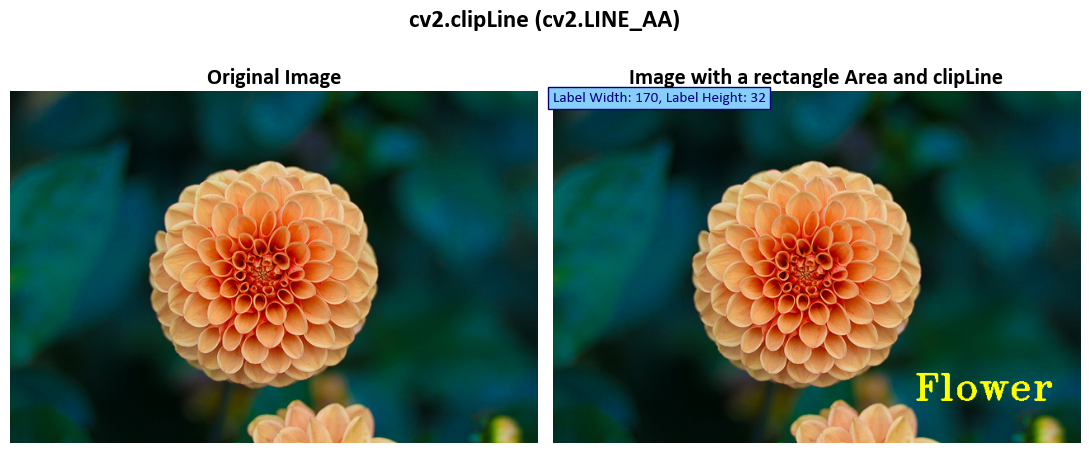

In [8]:
# Create an image with a yellow line
Img = Images[1].copy()  # Copy the second image
Out = Img.copy()  # Create a copy of the image
# getTextSize
(label_width, label_height), baseline = cv2.getTextSize(text = Names[1], fontFace = cv2.FONT_HERSHEY_TRIPLEX, fontScale = 1.5,
                                                    thickness = 2)
Out = cv2.putText(Out, text = Names[1],
                  org = (Out.shape[1] - label_width - int(0.05*Out.shape[1]),
                         Out.shape[0] - label_height - int(0.05*Out.shape[0])),
                  fontFace = cv2.FONT_HERSHEY_TRIPLEX, fontScale = 1.5, color = Colors['Yellow'], thickness = 2)

# Show the original and modified images with titles
fig, ax = ImShow([Img, Out], ['Original Image', 'Image with a rectangle Area and clipLine'],
                 title='cv2.clipLine (cv2.LINE_AA)')
_ = ax[1].text(x = 0, y = int(0.02*Out.shape[1]),
               s = ('Label Width: %i, ' % label_width + 'Label Height: %i' % label_height),
               size=11, color = 'Navy', bbox=dict(boxstyle="square", ec='Navy',fc='LightSkyBlue'))

This code snippet appears to be a Python script that uses the OpenCV library to manipulate images and display them with labeled information. Let's break down the code step by step:

1. **Image Preparation:**
   - It starts with an array of images, `Images`.
   - The second image (index 1-based) from this array is selected, and a copy of this image is created and stored in the variable `Img`.
   - Another copy of the same image is created and stored in the variable `Out`. This copy will be used for further modifications.

2. **Adding Text to the Image:**
   - The code calculates the size (width and height) of the text label that will be added to the image.
   - The `cv2.getTextSize()` function is used for this purpose. The parameters passed to this function include the text (`Names[1]`), font settings, and thickness of the text.
   - The calculated label size is then used to position the text on the image in such a way that it is near the bottom-right corner. The text is displayed in yellow (color specified by `Colors['Yellow']`) with a thickness of 2 pixels.

3. **Displaying Images with Labels:**
   - A function called `ImShow` (not defined in this snippet) is used to display two images side by side.
   - The original image (`Img`) and the modified image with the added label (`Out`) are shown.
   - Titles are provided for each image: "Original Image" for `Img` and "Image with a Rectangle Area and clipLine" for `Out`.
   - Additionally, information about the label's width and height is displayed above the modified image (`Out`). The label is colored with a navy background and light sky blue text.